## Data@ANZ Program: Raghuram Panyam



#### Task 1:

Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

Put together 2-3 slides summarising your most interesting findings to ANZ management.

#### Importing Required Libraries: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Reading Data:

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset (1).xlsx')

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### Performing some basic Checks on Data:

In [4]:
df.shape

(12043, 23)

In [5]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

### Checking for Missing Values:
It can be seen that there are a lot of missing values 

In [6]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

#### Checking For Duplicates

In [7]:
df.duplicated().sum()

0

### What is the % of Missing Values in each Column ?

In [8]:
(df.isna().sum()/len(df))*100

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

#### How many Unique Values are there?

In [9]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

### Analyzing and Checking Categorical variables:

 **Merchant Code and B-Pay Biller Code have over 90% of Missing Values**
 
 **SALES TYPE ? ( AUTHORIZED OR POPSTED)**

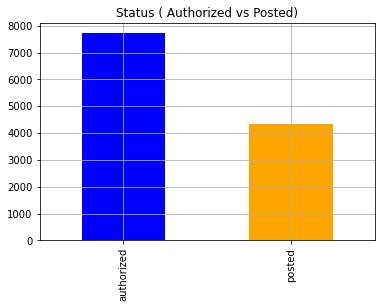

In [10]:
df.status.value_counts().plot(kind = 'bar',color = ['blue','orange'],title = 'Status ( Authorized vs Posted)',grid = True)

**CARD PRESENT FLAG: WAS THE TRANSACTION MADE BY CARD OR NOT?**

([<matplotlib.axis.XTick at 0x21e44f2ca00>,
 [Text(0, 0, 'Crd'), Text(0, 0, 'Without_Card')])

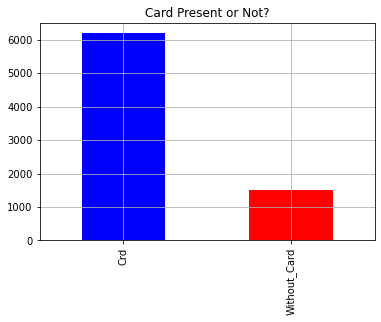

In [11]:
df.card_present_flag.value_counts().plot(kind='bar',grid = True, color = ['blue','red'], title = 'Card Present or Not?')
plt.xticks((0,1),('Crd','Without_Card'))

**WHAT % OF TRANSACTIONS WERE MADE BY CARD ?**

In [12]:
df.card_present_flag.value_counts()/sum(df.card_present_flag.value_counts())*100

1.0    80.264351
0.0    19.735649
Name: card_present_flag, dtype: float64

## Insight:
1. 80.2% of the Transactions were done through Cards
2. 19.8% transactions are done without cards.

###  Acounts: There are 100 unique accounts

In [13]:
len(df.account.unique())

100

#### CURRENCY:

In [14]:
df.currency.value_counts() ## Not Useful as there is only one currency 

AUD    12043
Name: currency, dtype: int64

#### TRANSACTION DESCRIPTION:

#### Insights:
- SALES - Point of Sale  and Point of Sales, Transaction types were the Most 
- Transactions over Phone Bank were the least 

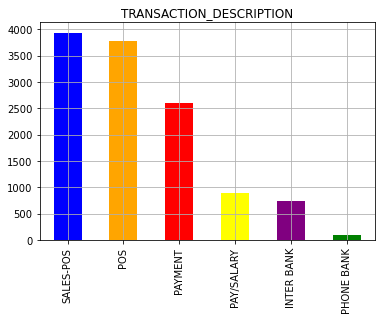

In [15]:
df.txn_description.value_counts().plot(kind='bar',grid = True,color = ['blue','orange','red','yellow','purple','green'],title = "TRANSACTION_DESCRIPTION" )

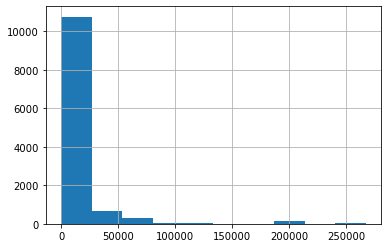

In [16]:
df.balance.hist() # BALANCE LOOKS RIGHT SKEWED

In [17]:
df['balance'].describe()

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
max      267128.520000
Name: balance, dtype: float64

### Insights from  Analysis:
- The average balance of the Customers is around 14704 AUD 
- The Maximum Balance is 267128.52
- The Minimum Balance is 0.24

In [18]:
df.date

0       2018-08-01
1       2018-08-01
2       2018-08-01
3       2018-08-01
4       2018-08-01
           ...    
12038   2018-10-31
12039   2018-10-31
12040   2018-10-31
12041   2018-10-31
12042   2018-10-31
Name: date, Length: 12043, dtype: datetime64[ns]

#### There is no Error  in Date Format

In [19]:
try:
    pd.to_datetime(df['date'], format='%d-%b-%Y', errors='raise')
    # do something
except ValueError:
    print("Error")

### Gender:

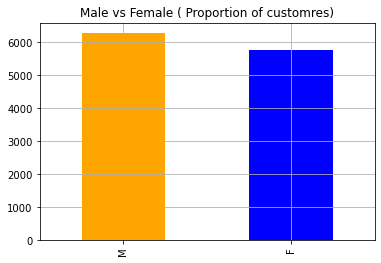

In [20]:
df.gender.value_counts().plot(kind='bar',color=['orange','blue'],grid = True,title = "Male vs Female ( Proportion of customres)")

In [21]:
df.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [22]:
df.gender.value_counts()/sum(df.gender.value_counts())*100

M    52.187993
F    47.812007
Name: gender, dtype: float64

In [23]:
df['age'].describe() # Age ranges from 18 to 78, with the Average age being 30

count    12043.000000
mean        30.582330
std         10.046343
min         18.000000
25%         22.000000
50%         28.000000
75%         38.000000
max         78.000000
Name: age, dtype: float64

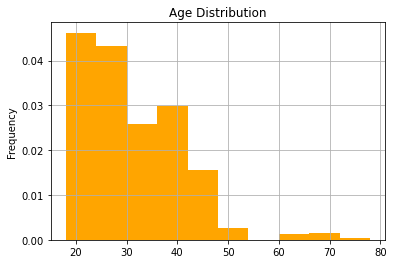

In [24]:
df.age.plot(kind='hist',color = 'orange',density=True,grid = True,title="Age Distribution") # Majority of the people are aged between 18- 40

In [25]:
len(df.merchant_suburb.unique())

1610

In [26]:
df.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

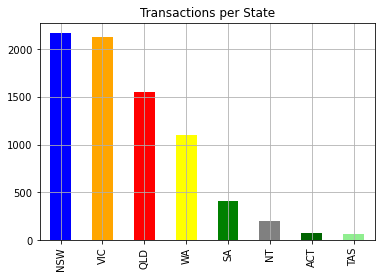

In [27]:
df.merchant_state.value_counts().plot(kind='bar',color = ['blue','orange','red','yellow','green','grey','darkgreen','lightgreen'],grid = True,title="Transactions per State")

- NSW and VIC are the Merchant States with the Most Number of Transactions 
- TAS and ACT are the least busiest Merchant States

In [28]:
df.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

#### Converting extraction  ( String) to date-time

In [29]:
df['extraction'] = pd.to_datetime(df['extraction'])

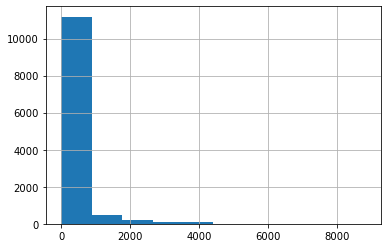

In [30]:
df.amount.hist() # Usually the Transactions are between 0 - 2000 Australian Dollars

In [31]:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [32]:
df.country.value_counts()

Australia    12043
Name: country, dtype: int64

In [33]:
df.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [34]:
df.movement.value_counts() / sum(df.movement.value_counts())*100

debit     92.66794
credit     7.33206
Name: movement, dtype: float64

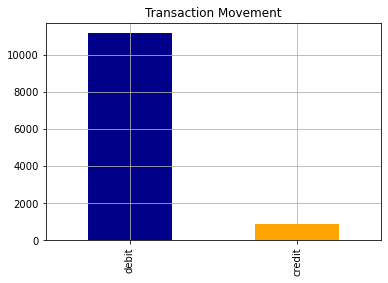

In [35]:
# plt.subplots(1,2)
df.movement.value_counts().plot(kind='bar',color = ['darkblue','orange'],grid = True,title="Transaction Movement")


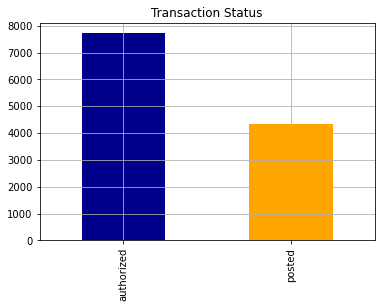

In [36]:
df.status.value_counts().plot(kind='bar',color = ['darkblue','orange'],grid = True,title="Transaction Status")

In [37]:
df.status.value_counts()/sum(df.status.value_counts()) * 100

authorized    64.078718
posted        35.921282
Name: status, dtype: float64

In [38]:
df.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

- 64% pf the Transactions are authorized 
- 35.9% of the Transactions are posted


### Some Inisights:

1. 80.2% of the Transactions were done through Cards
2. 19.8% transactions are done without cards.
3. SALES - Point of Sale  and Point of Sales, Transaction types were the Most 
4. Transactions over Phone Bank were the least.
5. The average balance of the Customers is around 14704 AUD 
6. The Maximum Balance is 267128.52
7. The Minimum Balance is 0.24.
8. Males Perform more  transactions as opposed to Females. ( Males 52%, Females 48%).
9. Majority of the people are aged between 18- 40
10. NSW and VIC are the Merchant States with the Most Number of Transactions 
11. TAS and ACT are the least busiest Merchant States.
12. 64% pf the Transactions are authorized 
13. 35.9% of the Transactions are posted
14. Over 92.6 % of the Transactions are debit 
15. Over 19% of the Transactions are credit


## Data Cleaning: 

### Dropping Uncessary Columns Namely:
1. Country 
2. Currency 
3. Merchant Code and B-Pay Biller Code. 

In [39]:
df_dropped = df.drop(['country','currency','bpay_biller_code','merchant_code'],axis=1) # Axis =1 indicates columns
df_dropped.shape

(12043, 19)

#### Dealing with  Missing Values:

In [40]:
df_dropped.isna().sum()

status                  0
card_present_flag    4326
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

As there is a werid pattern amongst the four columns, 4326 Missing Values, it is best to delete them if all same the rows in these columns are NA

In [41]:
missing_value_dataframe = df_dropped[df_dropped.isna().any(axis=1)][['card_present_flag','merchant_id','merchant_suburb','merchant_state']]
print("The missing value dataframe has: ",len(missing_value_dataframe), "rows in total, if the missing values are equal to the number of rows, then we can just drop the missing values")

missing_value_dataframe.isna().sum()

The missing value dataframe has:  4326 rows in total, if the missing values are equal to the number of rows, then we can just drop the missing values


card_present_flag    4326
merchant_id          4326
merchant_suburb      4326
merchant_state       4326
dtype: int64

**The Null Values cannot be dropped as all the null values are of POSTED STATUS which might Impact in the Modelling phase, if posted is significant**

In [42]:
df_dropped[df_dropped.status == "posted"].isna().sum()

status                  0
card_present_flag    4326
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

#### Commendint the Dropping all the NA Values Part for Now:

In [43]:
# df_dropped = df_dropped.dropna()
# df_dropped.isna().sum()

#### Creating new columns for Date and Seggregating Age group

In [44]:
df_dropped['Month'] = pd.DatetimeIndex(df_dropped['date']).month
df_dropped['Year'] = pd.DatetimeIndex(df_dropped['date']).year
df_dropped['Day'] = pd.DatetimeIndex(df_dropped['date']).day
df_dropped['age_group'] =pd.cut(df_dropped['age'],bins = [0,20,40,60,80], labels=['<20','20-40','40-60','60-80'])


### Now we have a dataframe with no duplicates , and useless columns !!!!!!!

General Analysis:

What is the Average Transaction amount? 

Age-group-Analysis:
Which age group has the highest / lowest transaction amount?
Which Age group Spends the Most? 
Which Age group Spends the least?

Location Analysis: 
Which Merchtant State has high transaction amounts?
Which Merchant Suburbs have low transaction amounts? 
Which age group is spending the most/ least in each othe states?
Which state has hgih / low transaction amounts?


Date?
Which months had the highest/lowest transaction?
Which Years had the highest / lowest transaction? 








## General Analysis:

In [45]:
df_dropped.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,Month,Year,Day,age_group
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2018,1,20-40
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2018,1,20-40
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2018,1,20-40
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2018,1,20-40
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2018,1,20-40


### Analysis on Transaction Amount:

1. Average Transaction Amount is 187.93
2. Maximum Amount Spent on a Transaction is 8835 AUD
3. Close to 1200 People Spent More than Average Transaction amount


In [46]:
df_dropped['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [47]:
len(df_dropped[df_dropped['amount'] > df_dropped.amount.mean()])

1194

#### The Average Transaction Amount per Age-Group:

1. Ages: 20-40 SPend the Most 
2. Ages 60-80 Spend the Least. 
3. Ages 20-40 have the most balance 
4. Ages 60 -80 have very minimal balance

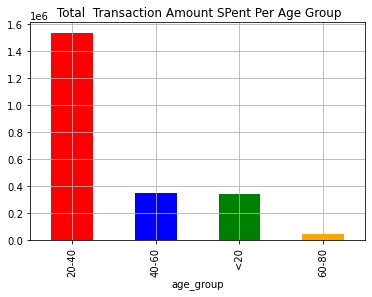

In [48]:
age_average_transaction = df_dropped.groupby(['age_group']).sum().sort_values('amount',ascending=False)
age_average_transaction['age_group']=list(age_average_transaction.index)
age_average_transaction['amount'].plot(kind='bar',color=['red','blue','green','orange'],grid = True,title = ' Total  Transaction Amount SPent Per Age Group')

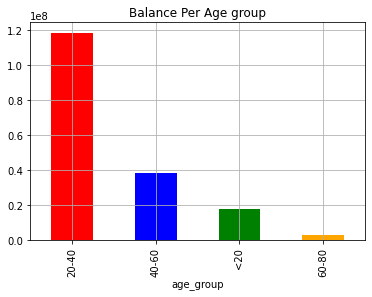

In [49]:
df_dropped.groupby(['age_group']).sum().sort_values('balance',ascending = False)['balance'].plot(kind='bar',color=['red','blue','green','orange'],title='Balance Per Age group',grid=True)

In [50]:
df_dropped[df_dropped['amount'] == df_dropped['amount'].max()]['age'] 

2401     40
6529     40
10429    40
10430    40
Name: age, dtype: int64

**The Maximum Transaction was done by a customer named Tin in the Age group of 20-40**

### Time Analysis:

### Analysis by Month:

Text(0.5, 0, 'Months')

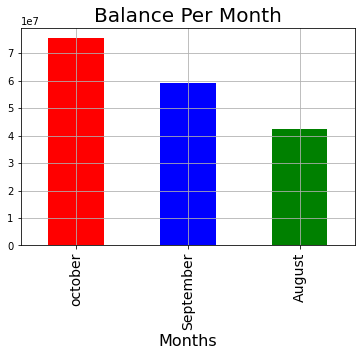

In [51]:
df_dropped.groupby(['Month']).sum().sort_values('balance',ascending = False)['balance'].plot(kind='bar',color=['red','blue','green','orange'],title='Bank Balance per month',grid=True)
positions = (0,1,2)
plt.title("Balance Per Month", fontsize=20)
labels = ("october","September","August")
plt.xticks(positions,labels,fontsize=14)
plt.xlabel('Months',fontsize=16)


In [52]:
df_dropped.groupby(['Month']).sum().sort_values('balance',ascending = False)

,card_present_flag,balance,age,amount,Year,Day
Month,,,,,,
10,2074.0,75409202.53,125578,802798.47,8247566,64858
9,2079.0,59112096.51,122531,730550.21,8098234,62517
8,2041.0,42561328.01,120194,729935.52,7956974,63662


Text(0.5, 0, 'Months')

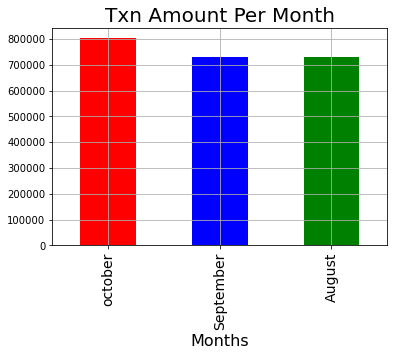

In [53]:
df_dropped.groupby(['Month']).sum().sort_values('amount',ascending = False)['amount'].plot(kind='bar',color=['red','blue','green','orange'],title='Bank Balance per month',grid=True)
positions = (0,1,2)
plt.title("Txn Amount Per Month", fontsize=20)
labels = ("october","September","August")
plt.xticks(positions,labels,fontsize=14)
plt.xlabel('Months',fontsize=16)


In [54]:
import datetime as dt

In [55]:
## Transaction Amount Per day

In [56]:
df_dropped['day_name'] = df_dropped.date.dt.day_name()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

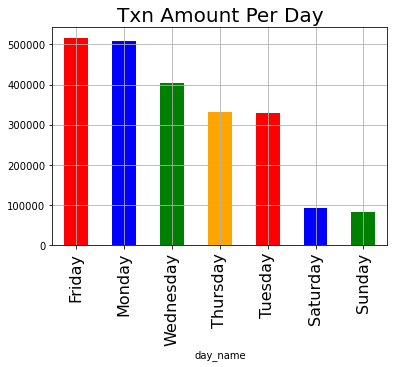

In [57]:
df_dropped.groupby(['day_name']).sum().sort_values('amount',ascending = False)['amount'].plot(kind='bar',color=['red','blue','green','orange'],grid=True)
plt.title("Txn Amount Per Day", fontsize=20)
labels = ("october","September","August")
plt.xticks(fontsize=16)


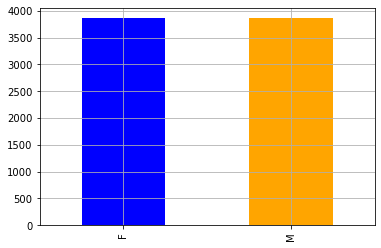

In [58]:
df_dropped[df_dropped.status == "authorized"]['gender'].value_counts().plot(kind='bar',color=['blue','orange'],grid=True)


In [59]:
df_dropped[df_dropped.status == "authorized"]['gender'].value_counts()

F    3862
M    3855
Name: gender, dtype: int64

## Part 2 : Data Modelling
- Using the same transaction dataset, identify the annual salary for each customer

- Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

- Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

- How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

- For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

### Computing Annual Salary:

In [60]:
df_dropped.customer_id.nunique()

100

In [61]:
df_dropped.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [62]:
df_salary = df_dropped[df_dropped.txn_description == "PAY/SALARY"]
customer_id_salary_list = list(df_salary.groupby(['customer_id'],as_index=False)['amount'].sum().to_records(index=False))


In [63]:
annual_salary = []
for i in list(df_dropped['customer_id']):
    for j in customer_id_salary_list:
        if i==j[0]:
            annual_salary.append(round(j[1],2))

In [64]:
df_dropped['Annual_Salary'] = annual_salary

In [65]:
df_dropped.corr()

,card_present_flag,balance,age,amount,Month,Year,Day,Annual_Salary
card_present_flag,1.000000,0.005925,-0.008405,-0.002074,-0.001568,NaN,-0.004795,-0.018868
balance,0.005925,1.000000,0.199329,0.059178,0.099208,NaN,0.016902,0.253089
age,-0.008405,0.199329,1.000000,0.029980,0.009923,NaN,-0.002528,0.026425
amount,-0.002074,0.059178,0.029980,1.000000,0.007860,NaN,-0.001089,0.091213
Month,-0.001568,0.099208,0.009923,0.007860,1.000000,NaN,-0.012437,-0.002257
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,-0.004795,0.016902,-0.002528,-0.001089,-0.012437,NaN,1.000000,0.014815
Annual_Salary,-0.018868,0.253089,0.026425,0.091213,-0.002257,NaN,0.014815,1.000000


## Visualizing correlations wrt Target Variable:

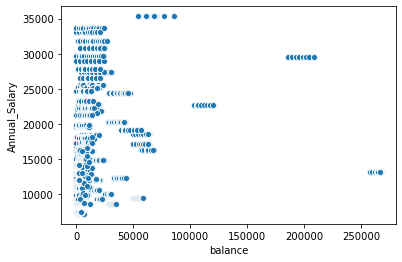

In [66]:
sns.scatterplot(x='balance',y='Annual_Salary',data = df_dropped)

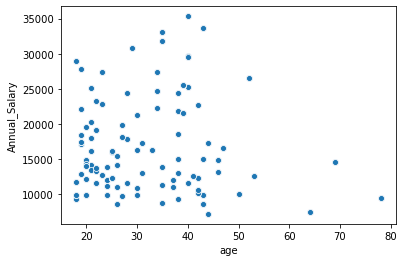

In [67]:
sns.scatterplot(x='age',y="Annual_Salary",data=df_dropped)

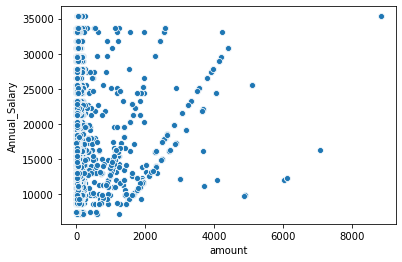

In [68]:
sns.scatterplot(x='amount',y="Annual_Salary",data=df_dropped)

## Plotting all the Variables:

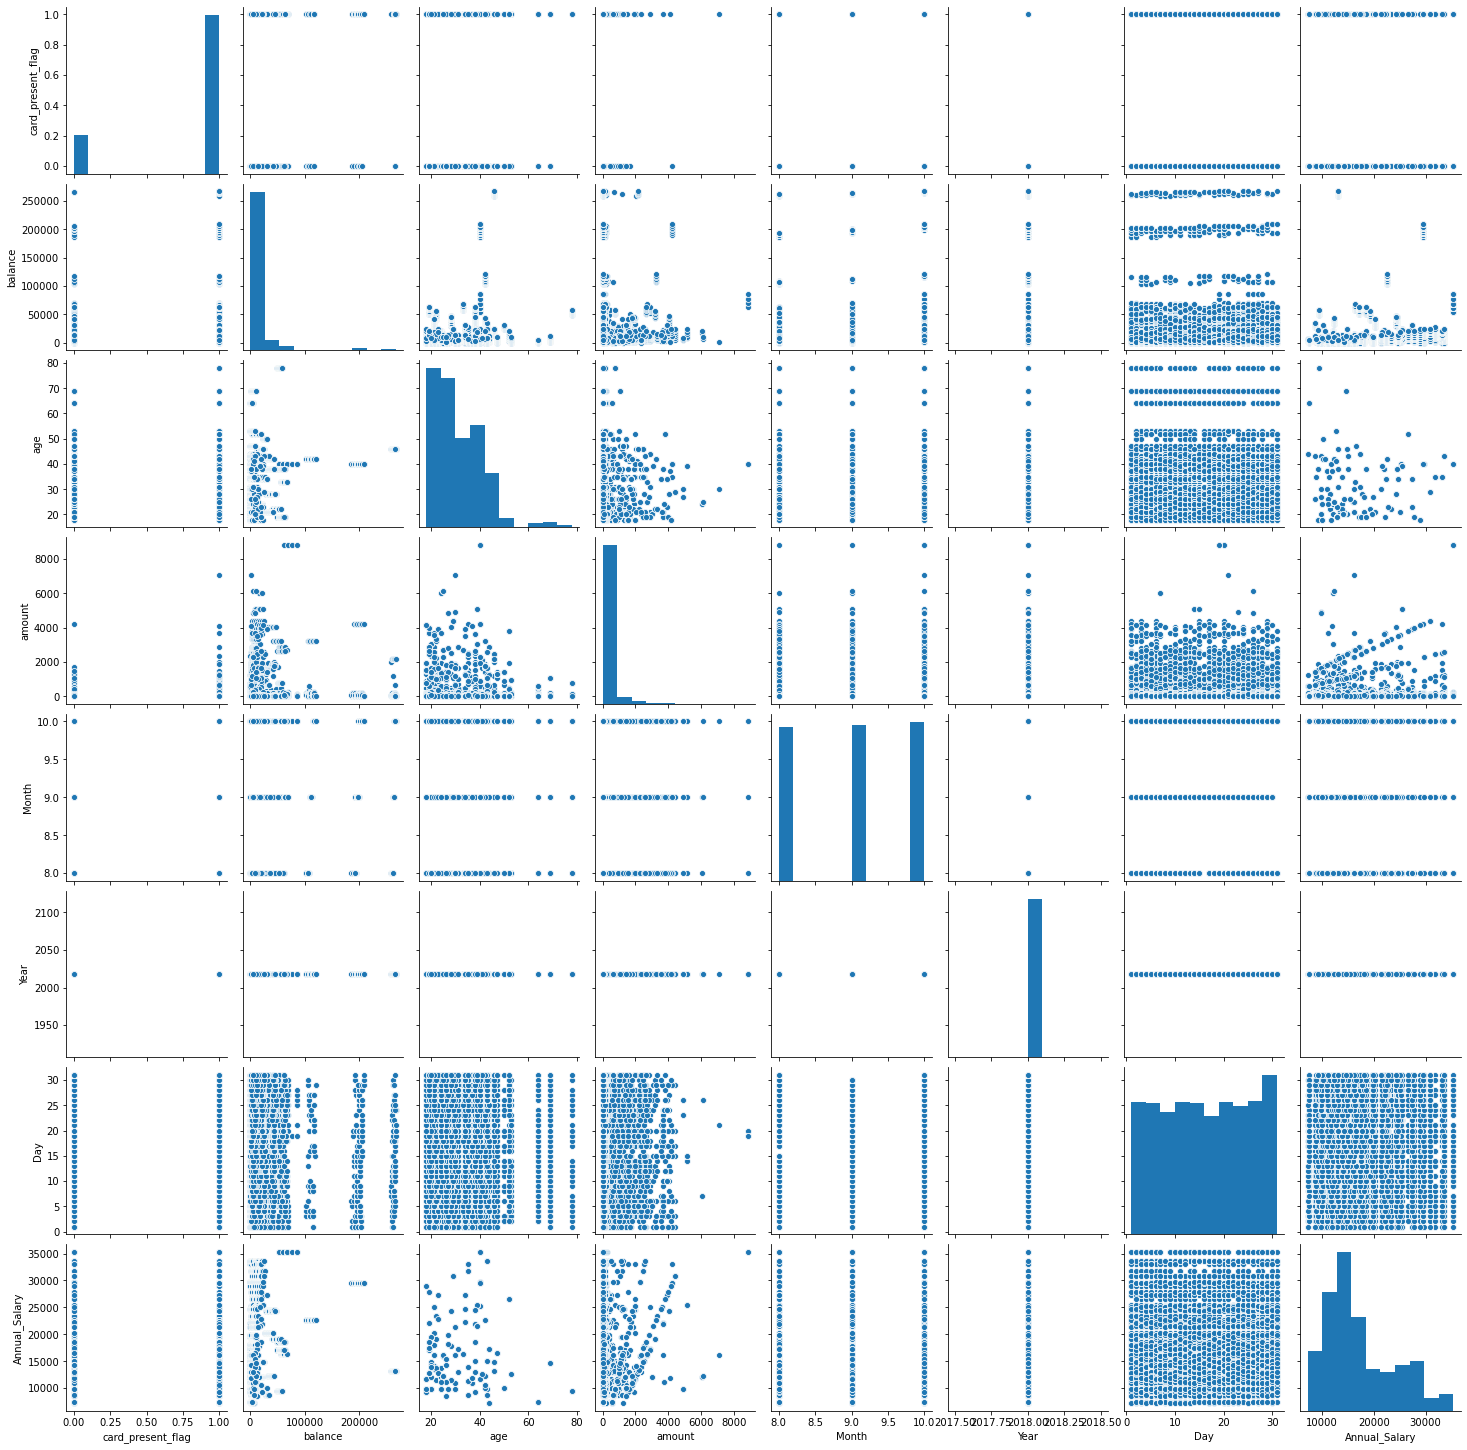

In [69]:
sns.pairplot(df_dropped)

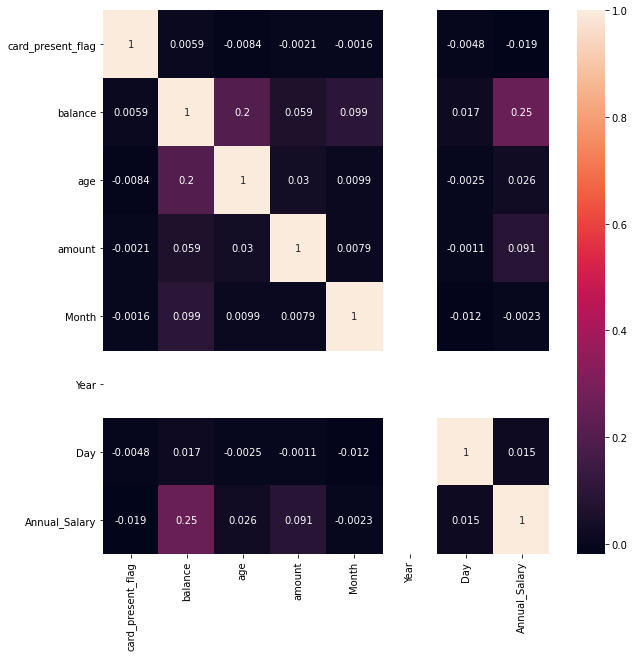

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_dropped.corr(),annot=True)

There is a positive correlation between Anual Salary and:
    - Balance ( 25%)
    - Age ( 2.6%)
    - Amount ( 9.1%)
    - Day (1.48 %)
    
    
    
 There is a negative correlation between Annual Salary and:
     
     - Card Present Flag (-1.8%)
      - Month  (-0.2%)
      
 - Overall, Card Present Flag and Annual Salary have the lowest Correlation ( -1.8%)
    

In [71]:
df_dropped.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'Month', 'Year', 'Day', 'age_group', 'day_name', 'Annual_Salary'],
      dtype='object')

In [72]:
df_dropped['status'] = pd.factorize(df_dropped.status)[0]
df_dropped['txn_description'] = pd.factorize(df_dropped.txn_description)[0]
df_dropped['movement'] = pd.factorize(df_dropped.movement)[0]
df_dropped['gender'] = pd.factorize(df_dropped.gender)[0]
df_dropped['Month'] = pd.factorize(df_dropped.Month)[0]
df_dropped['merchant_state'] = pd.factorize(df_dropped.merchant_state)[0]

df_dropped['account'] = pd.factorize(df_dropped.account)[0]
df_dropped['transaction_id'] = pd.factorize(df_dropped.transaction_id)[0]
df_dropped['merchant_suburb'] = pd.factorize(df_dropped.merchant_suburb)[0]
df_dropped['customer_id'] = pd.factorize(df_dropped.customer_id)[0]



df_dropped['merchant_id'] = pd.factorize(df_dropped.merchant_id)[0]

df_dropped_2 = df_dropped.drop(['extraction','date','day_name','Year','long_lat','age_group','merchant_long_lat','first_name'],axis=1)

In [73]:
df_dropped_2.head()

,status,card_present_flag,account,txn_description,merchant_id,balance,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,Month,Day,Annual_Salary
0,0,1.0,0,0,0,35.39,0,26,0,0,16.25,0,0,0,0,1,14191.38
1,0,0.0,0,1,1,21.20,0,26,1,1,14.19,1,0,0,0,1,14191.38
2,0,1.0,1,0,2,5.71,1,38,1,1,6.42,2,1,0,0,1,13027.69
3,0,1.0,2,1,3,2117.22,0,40,2,0,40.90,3,2,0,0,1,11597.17
4,0,1.0,0,1,4,17.95,0,26,3,0,3.25,4,0,0,0,1,14191.38


In [76]:
df_dropped_2.isna().sum()

status                  0
card_present_flag    4326
account                 0
txn_description         0
merchant_id             0
balance                 0
gender                  0
age                     0
merchant_suburb         0
merchant_state          0
amount                  0
transaction_id          0
customer_id             0
movement                0
Month                   0
Day                     0
Annual_Salary           0
dtype: int64

In [80]:
df_dropped_2['card_present_flag'] = df_dropped_2['card_present_flag'].fillna(df_dropped_2['card_present_flag'].mode()[0])

In [81]:
df_dropped_2.isna().sum()

status               0
card_present_flag    0
account              0
txn_description      0
merchant_id          0
balance              0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
amount               0
transaction_id       0
customer_id          0
movement             0
Month                0
Day                  0
Annual_Salary        0
dtype: int64

### Simple Regression Model:

In [110]:
df_dropped_2_train = df_dropped_2.drop(['Annual_Salary'],axis=1)

In [111]:
X = df_dropped_2_train
Y = df_dropped_2['Annual_Salary']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Value of intercept is")
print(lm.intercept_)
predictions = lm.predict(X_test)
print(predictions)



Value of intercept is
14056.060597672647
[18165.79920333 15507.91350731 14305.13329599 ... 14891.41649231
 16899.68605686 16789.44735043]


## Testing Accuracy:

In [112]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("r2 Score", r2_score(y_test,predictions))


MAE: 4756.644505926837
MSE: 37198645.32919199
RMSE: 6099.0692182653565
r2 Score 0.13394634507792424


## Decision Tree:

In [118]:
from sklearn.tree import DecisionTreeRegressor
data_mymodel = DecisionTreeRegressor()
data_mymodel.fit(X_train,y_train)
prediction_decision_tree = data_mymodel.predict(X_test)
print("MSE for Decision Tree :",metrics.mean_squared_error(y_test,prediction_decision_tree))
print("MAE for Decision Tree:", metrics.mean_absolute_error(y_test, prediction_decision_tree))
print("RMSE for D Tree:",np.sqrt(metrics.mean_squared_error(y_test, prediction_decision_tree)))

print("r2 Score for Dtree:",r2_score(y_test,prediction_decision_tree))

MSE for Decision Tree : 367091.6388911432
MAE for Decision Tree: 47.406828120687415
RMSE for D Tree: 605.8808784663395
r2 Score for Dtree: 0.9914534238346707


- Decision tree is a better model 
- It captures non linearity better 
- Not effected by Multicolinearity
- Linear regression can be improved by :
    - Most Significant Variables ( P-Value)
    - Dropping Correlated Variables
    - Adding Interactions 
    - Selecting best subset methods such as:
        - Reg Subsets
        - AIC, BIC step selection methods etc..
    

In [120]:
MSE = [37198645.32919199,367091.6388911432]
MAE =[4756.644505926837,47.406828120687415]
RMSE = [6099,605.8]
R2 = [0.13,0.99]
pd.DataFrame({"MSE": MSE, "MAE": MAE,"R2": R2, "RMSE" : RMSE},index=["Linear Regression","Decision Tree"])

,MSE,MAE,R2,RMSE
Linear Regression,3.719865e+07,4756.644506,0.13,6099.0
Decision Tree,3.670916e+05,47.406828,0.99,605.8
